In [72]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [73]:
data_frame = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=1)

In [74]:
freq_tab = data_frame[['Sum of pollution sources','Turbdity_NTU']]

In [75]:
frequency_distribution_table = pd.DataFrame(columns=['Name','Frequency','Missing', 'Percentage', 'Cumulative per'])
frequency_distribution_table['Frequency'] = freq_tab['Sum of pollution sources'].value_counts()
frequency_distribution_table['Missing']= freq_tab['Sum of pollution sources'].isna().sum()
frequency_distribution_table['Percentage'] = freq_tab['Sum of pollution sources'].value_counts(normalize=True)*100
frequency_distribution_table['Cumulative per'] = 100 * (freq_tab['Sum of pollution sources'].cumsum()/freq_tab['Sum of pollution sources'].sum()) 

In [87]:
frequency_distribution_table

,Name,Frequency,Missing,Percentage,Cumulative per
0,NaN,2147,0,37.653455,0.013235
2,NaN,1344,0,23.570677,0.079407
1,NaN,1046,0,18.344441,0.052938
3,NaN,954,0,16.730972,0.105876
4,NaN,127,0,2.227289,0.132345
5,NaN,52,0,0.911961,0.158814
6,NaN,32,0,0.561207,0.198518


In [7]:
algae_obs = data_frame['c) Is the algae...']

In [8]:
set_of_possiblities = algae_obs.unique()[:5]
counting=dict.fromkeys(algae_obs.unique()[:5])
for i in algae_obs:
    if i in set_of_possiblities:
        if counting[i] == None:
            counting[i] = 0
        else:
            counting[i]+=1
counting

{'No algae': 3750,
 'Evenly dispersed': 263,
 'Floating mats': 187,
 'Blue-green scum': 84,
 'Attached': 451}

In [70]:
color = data_frame['a) Estimate the water colour']
frequency_distribution_table = pd.DataFrame()
frequency_distribution_table.index.name='Water colour'
frequency_distribution_table['Frequency'] = color.value_counts()
# frequency_distribution_table['Missing']= freq_tab['a) Estimate the water colour'].isna().sum()
frequency_distribution_table['Percentage'] = 100*color.value_counts(normalize=True).round(2)
frequency_distribution_table['Cumulative percentage'] = 100*(color.value_counts().cumsum()/color.value_counts().sum()).round(2)
frequency_distribution_table.loc['Total']= frequency_distribution_table.sum()


In [71]:
frequency_distribution_table

,Frequency,Percentage,Cumulative percentage
Water colour,,,
Colourless,1774.0,35.0,35.0
Brown,1391.0,28.0,63.0
Green,704.0,14.0,77.0
Yellow,700.0,14.0,90.0
Other,484.0,10.0,100.0
Total,5053.0,101.0,365.0


<AxesSubplot:xlabel='Water colour'>

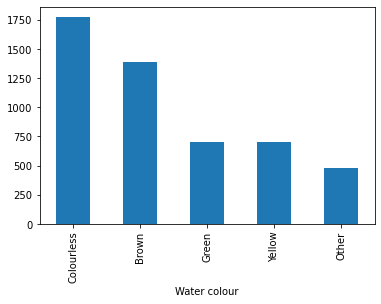

In [58]:
fig, ax = plt.subplots()
frequency_distribution_table['Frequency'].plot(ax=ax, kind='bar')

In [33]:
color = data_frame['a) Estimate the water colour']
flow = data_frame['a) Estimate the water flow']
contingency_tab = pd.crosstab(index=flow, columns=color, margins=True, normalize='columns').round(4)*100



In [34]:
contingency_tab

a) Estimate the water colour,Brown,Colourless,Green,Other,Yellow,All
a) Estimate the water flow,,,,,,
Slow,28.55,32.84,41.62,45.55,32.86,34.11
Steady,49.53,53.36,35.23,35.40,47.14,47.19
Still,14.35,7.57,17.76,12.63,12.71,12.06
Surging,7.57,6.22,5.40,6.42,7.29,6.64
